#Estimation of obesity levels - [DataTalks.Club](https://datatalks.club)'s midterm project by [Alexander D. Rios](https://linktr.ee/aletbm)

<img src=https://i.postimg.cc/m2SckQPM/body-mass-index-calculator-2.png>

# Downloading the dataset

In [1]:
!wget https://archive.ics.uci.edu/static/public/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip
!unzip -o /content/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip

--2024-11-23 19:19:02--  https://archive.ics.uci.edu/static/public/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip’

estimation+of+obesi     [ <=>                ]  56.32K  --.-KB/s    in 0.05s   

2024-11-23 19:19:02 (1.04 MB/s) - ‘estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip’ saved [57676]

Archive:  /content/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip
  inflating: ObesityDataSet_raw_and_data_sinthetic.csv  


# Installing some packages

In [2]:
!pip install mplcyberpunk
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00


# Feature description

<table>
<th>Feature</th><th>Description</th>
<tr><td>Gender</td></tr>
<tr><td>Age</td></tr>
<tr><td>Height</td></tr>
<tr><td>Weight</td></tr>
<tr><td>family_history_with_overweight</td><td>Has a family member suffered or suffers from overweight?</td></tr>
<tr><td>FAVC</td><td>Do you eat high caloric food frequently?</td></tr>
<tr><td>FCVC</td><td>Do you usually eat vegetables in your meals?</td></tr>
<tr><td>NCP</td><td>How many main meals do you have daily?</td></tr>
<tr><td>CAEC</td><td>Do you eat any food between meals?</td></tr>
<tr><td>SMOKE</td><td>Do you smoke?</td></tr>
<tr><td>CH20</td><td>How much water do you drink daily?</td></tr>
<tr><td>SCC</td><td>Do you monitor the calories you eat daily?</td></tr>
<tr><td>FAF</td><td>How often do you have physical activity?</td></tr>
<tr><td>TUE</td><td>How much time do you use technological devices such as cell phone, videogames, television, computer and others?</td></tr>
<tr><td>CALC</td><td>How often do you drink alcohol?</td></tr>
<tr><td>MTRANS</td><td>Which transportation do you usually use?</td></tr>
<tr><td>NObeyesdad</td><td>Obesity level</td></tr>
</table>

# Loading the dataset

In [3]:
import pandas as pd
df_raw = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")
df_raw.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Exploratory data analysis (EDA)

## Renaming the columns

In [4]:
df_raw = df_raw.rename(columns={"family_history_with_overweight": "overweight_familiar",
                       "FAVC":"eat_HC_food",
                       "FCVC":"eat_vegetables",
                       "NCP":"main_meals",
                       "CAEC":"snack",
                       "CH2O":"drink_water",
                       "SCC":"monitoring_calories",
                       "FAF":"physical_activity",
                       "TUE":"use_of_technology",
                       "CALC":"drink_alcohol",
                       "MTRANS":"transportation_type",
                       "NObeyesdad":"obesity_level"
                       }).rename(columns=str.lower)
df_raw.columns

Index(['gender', 'age', 'height', 'weight', 'overweight_familiar',
       'eat_hc_food', 'eat_vegetables', 'main_meals', 'snack', 'smoke',
       'drink_water', 'monitoring_calories', 'physical_activity',
       'use_of_technology', 'drink_alcohol', 'transportation_type',
       'obesity_level'],
      dtype='object')

## Dropping duplicated

In [5]:
df_raw.duplicated().sum()

24

In [6]:
df_raw = df_raw.drop_duplicates()
df_raw.duplicated().sum()

0

## Looking for missing values

In [7]:
df_raw.isna().sum()

,0
gender,0
age,0
height,0
weight,0
overweight_familiar,0
eat_hc_food,0
eat_vegetables,0
main_meals,0
snack,0
smoke,0


## Statistical description

In [8]:
df_raw.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,2087,2,Male,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,2087.0,NaN,NaN,NaN,24.35309,6.368801,14.0,19.915937,22.847618,26.0,61.0
height,2087.0,NaN,NaN,NaN,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
weight,2087.0,NaN,NaN,NaN,86.85873,26.190847,39.0,66.0,83.1011,108.015907,173.0
overweight_familiar,2087,2,yes,1722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eat_hc_food,2087,2,yes,1844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eat_vegetables,2087.0,NaN,NaN,NaN,2.421466,0.534737,1.0,2.0,2.396265,3.0,3.0
main_meals,2087.0,NaN,NaN,NaN,2.701179,0.764614,1.0,2.697467,3.0,3.0,4.0
snack,2087,4,Sometimes,1761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoke,2087,2,no,2043,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Looking for the classes in categorical features

In [9]:
df_raw.head()

,gender,age,height,weight,overweight_familiar,eat_hc_food,eat_vegetables,main_meals,snack,smoke,drink_water,monitoring_calories,physical_activity,use_of_technology,drink_alcohol,transportation_type,obesity_level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
df_raw.select_dtypes("object").nunique()

,0
gender,2
overweight_familiar,2
eat_hc_food,2
snack,4
smoke,2
monitoring_calories,2
drink_alcohol,4
transportation_type,5
obesity_level,7


In [11]:
df = df_raw.copy()

## Data visualization

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

### Balance of the target variable

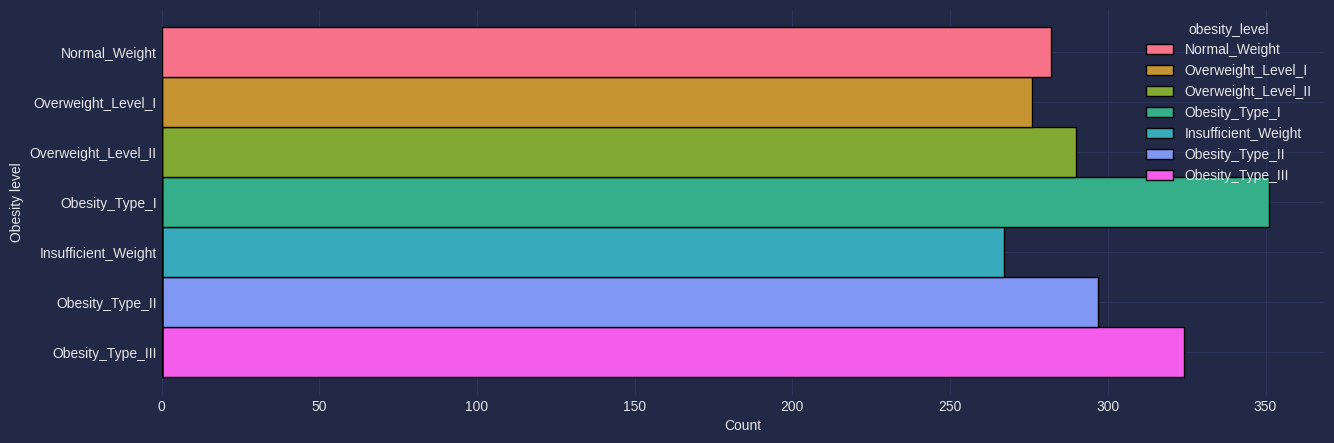

In [13]:
plt.figure(figsize=(15, 5))
sns.histplot(df, y="obesity_level", hue="obesity_level", alpha=1)
plt.ylabel("Obesity level");

### The distribution of age in relation to obesity levels

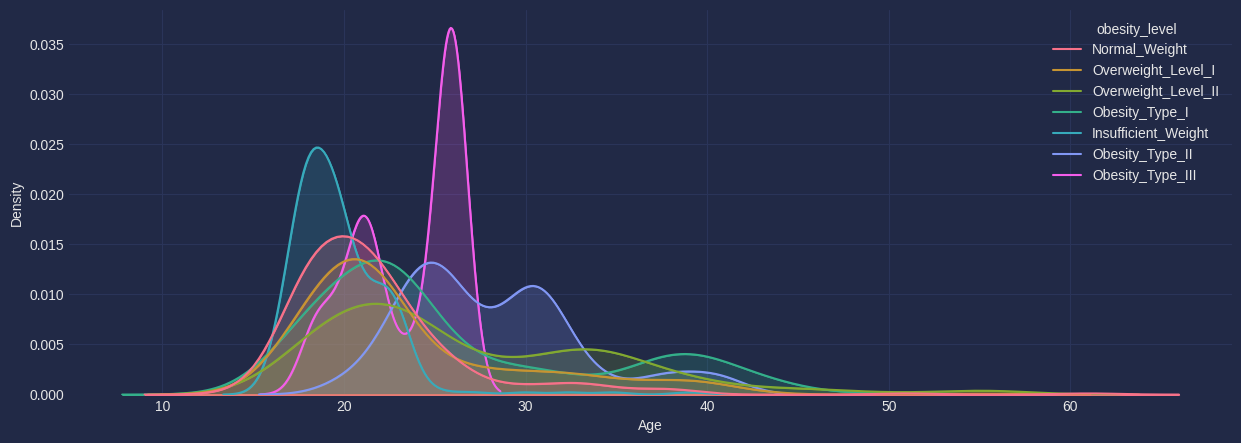

In [14]:
plt.figure(figsize=(15, 5))
sns.kdeplot(df, x="age", hue="obesity_level", fill=True, alpha=.2)
sns.kdeplot(df, x="age", hue="obesity_level")
plt.xlabel("Age");

### Height and weight in relation to obesity levels

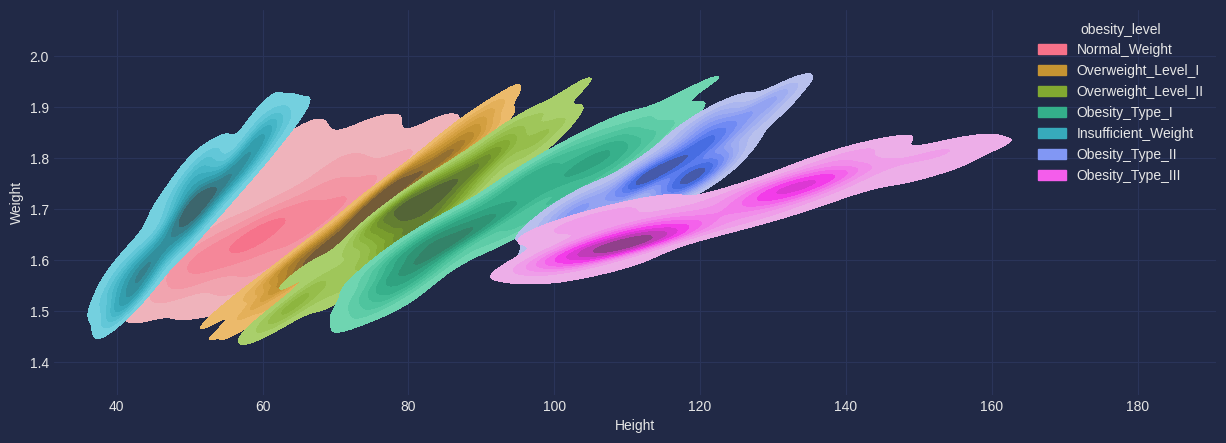

In [15]:
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df, x="weight", y="height", hue="obesity_level", fill=True)
plt.xlabel("Height")
plt.ylabel("Weight");

### The relationship between obesity levels and having overweight family members

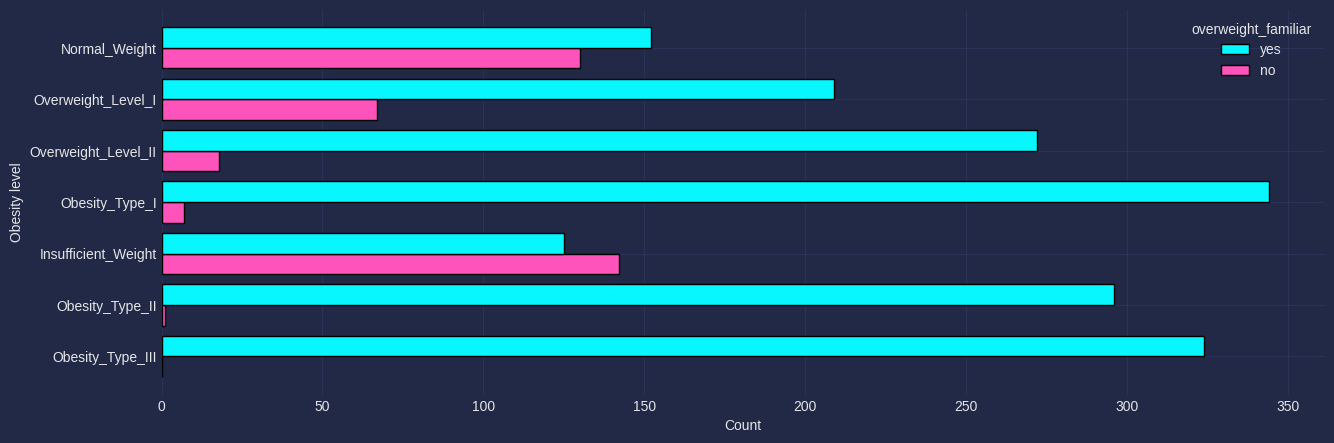

In [16]:
plt.figure(figsize=(15, 5))
sns.histplot(df, y="obesity_level", hue="overweight_familiar", multiple="dodge", shrink=0.8, alpha=1)
plt.ylabel("Obesity level");

### The relationship between obesity levels and the consumption of high-calorie foods

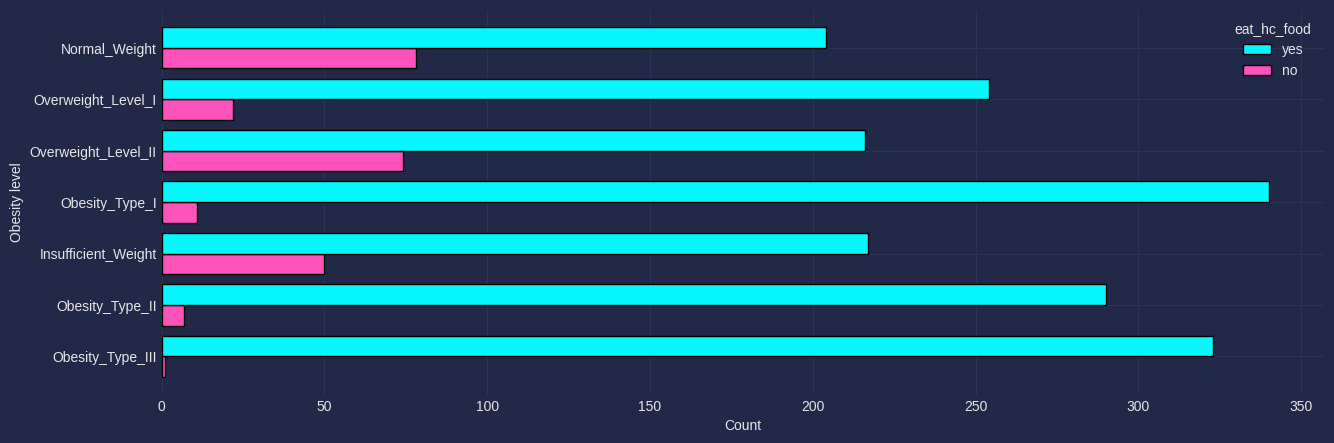

In [17]:
plt.figure(figsize=(15, 5))
sns.histplot(df, y="obesity_level", hue="eat_hc_food", multiple="dodge", shrink=0.8, hue_order=["yes", "no"], alpha=1)
plt.ylabel("Obesity level");

### The relationship between obesity levels and vegetable eating habits

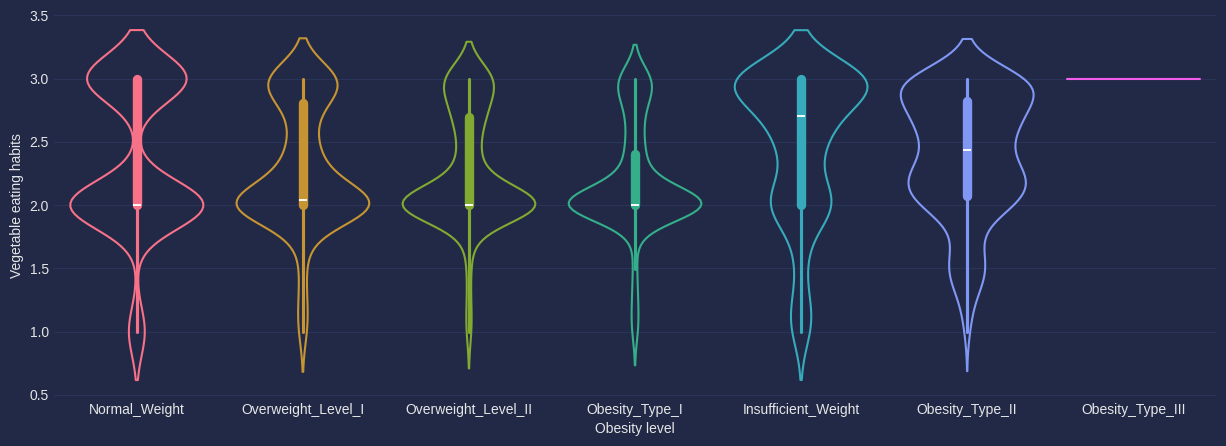

In [18]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x="obesity_level", y="eat_vegetables", hue="obesity_level", fill=False)
plt.ylabel("Vegetable eating habits")
plt.xlabel("Obesity level");

### The relationship between obesity levels and the number of main meals

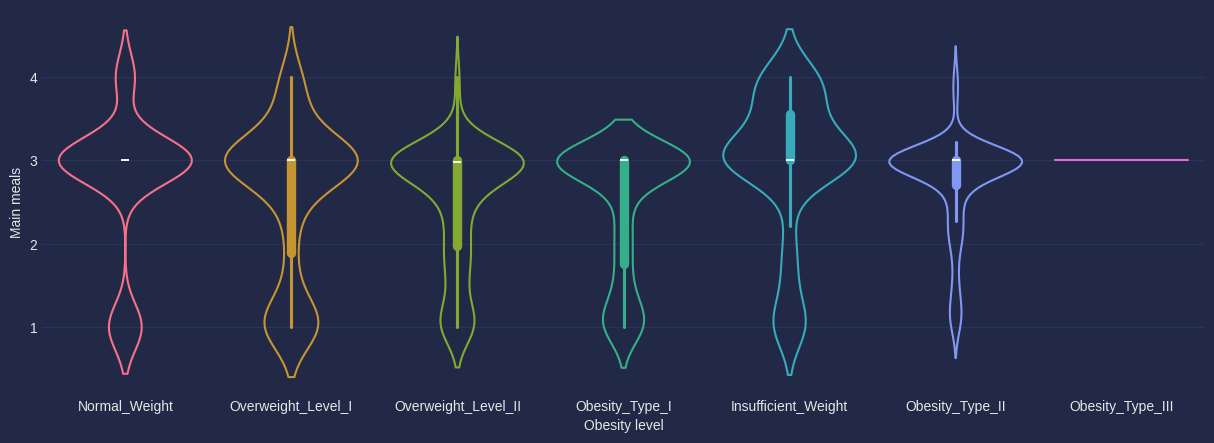

In [19]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x="obesity_level", y="main_meals", hue="obesity_level", fill=False)
plt.ylabel("Main meals")
plt.xlabel("Obesity level");

### The relationship between obesity levels and snack eating habits

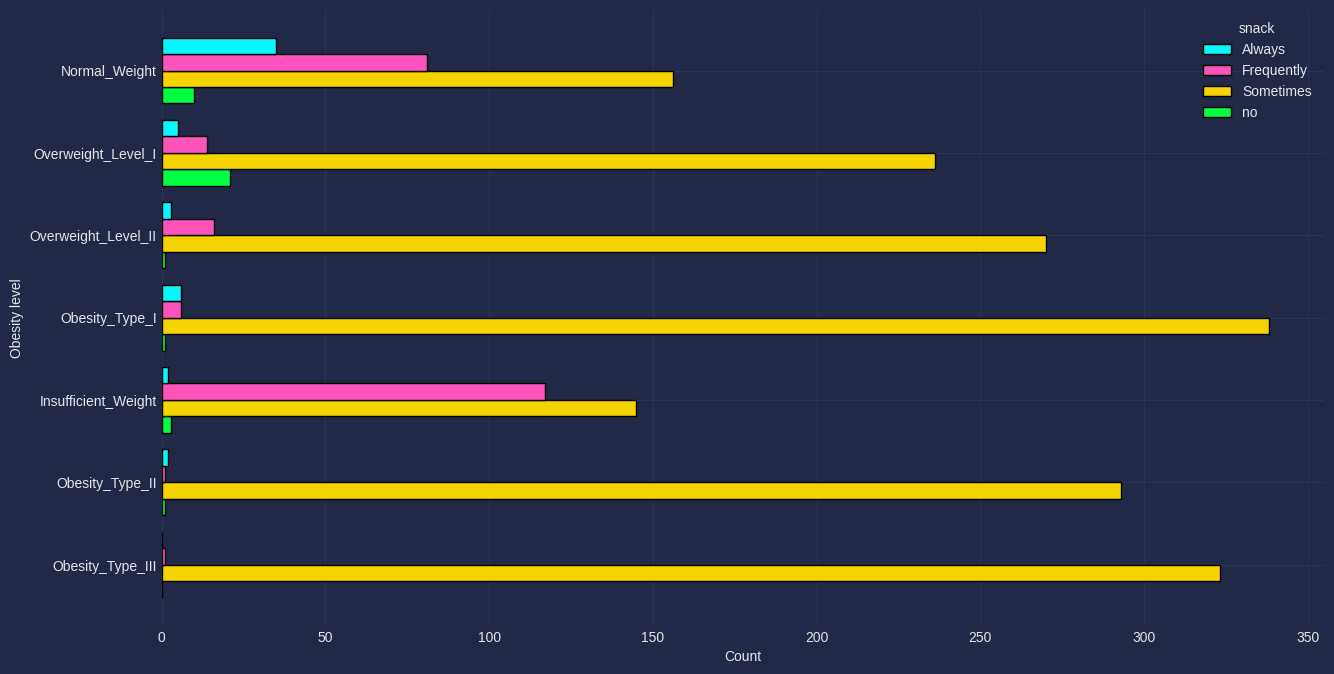

In [20]:
plt.figure(figsize=(15, 8))
sns.histplot(df, y="obesity_level", hue="snack", multiple="dodge", shrink=0.8, hue_order=["Always", "Frequently", "Sometimes", "no"], alpha=1)
plt.ylabel("Obesity level");

### The relationship between obesity levels and smoking habits

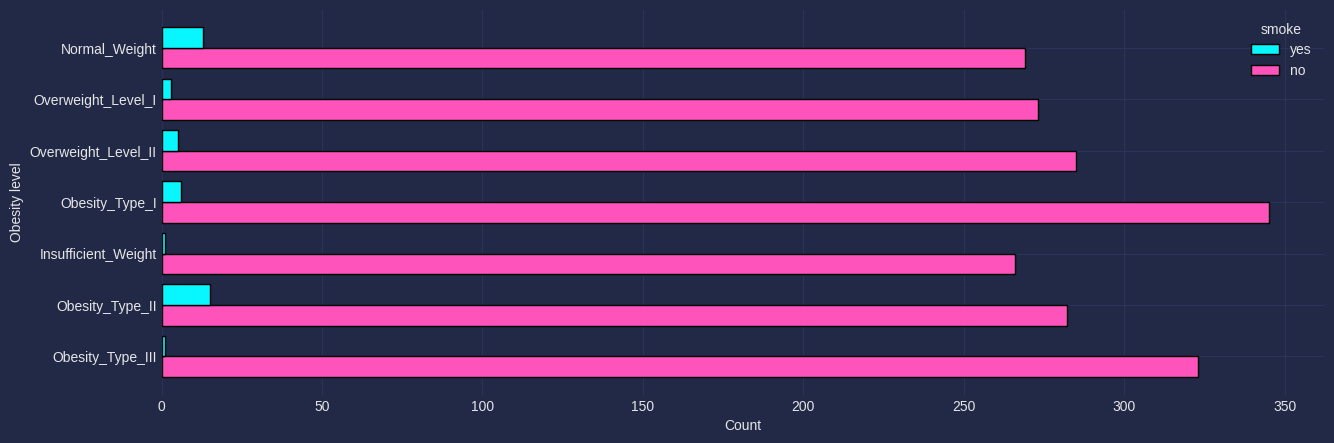

In [21]:
plt.figure(figsize=(15, 5))
sns.histplot(df, y="obesity_level", hue="smoke", multiple="dodge", shrink=0.8, hue_order=["yes", "no"], alpha=1)
plt.ylabel("Obesity level");

### The relationship between obesity levels and water consumption

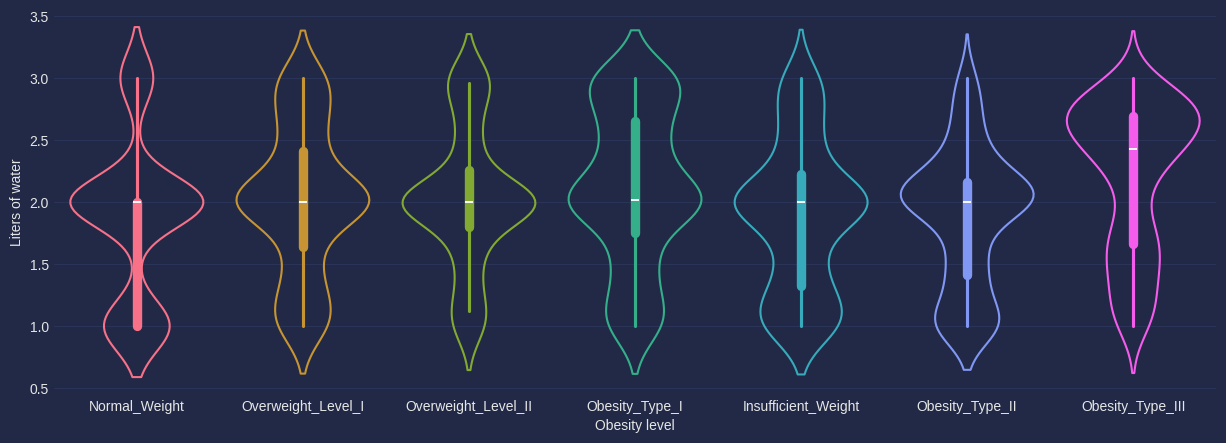

In [22]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x="obesity_level", y="drink_water", hue="obesity_level", fill=False)
plt.ylabel("Liters of water")
plt.xlabel("Obesity level");

### Calorie monitoring habits in relation to obesity levels

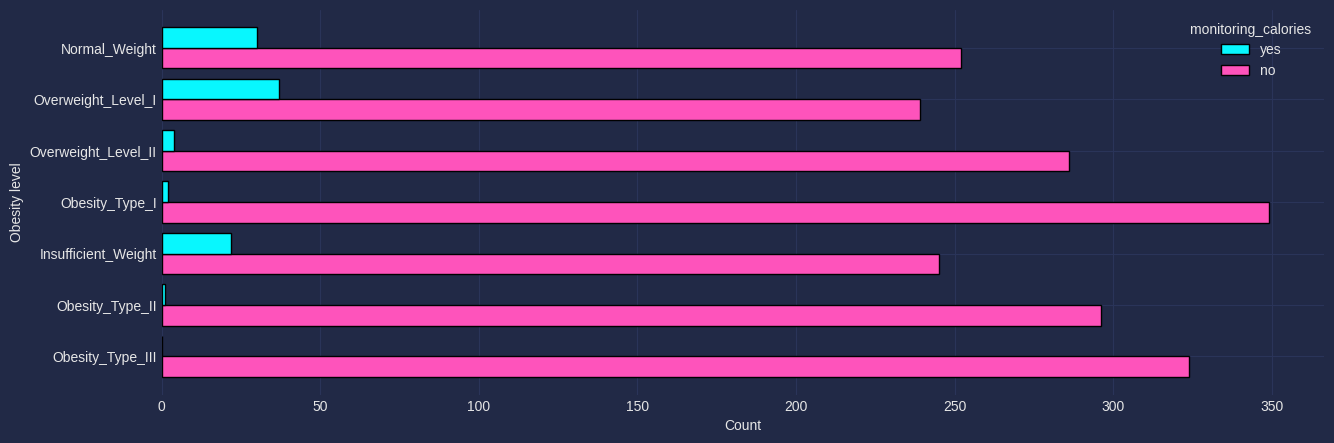

In [23]:
plt.figure(figsize=(15, 5))
sns.histplot(df, y="obesity_level", hue="monitoring_calories", multiple="dodge", shrink=0.8, hue_order=["yes", "no"], alpha=1)
plt.ylabel("Obesity level");

### Physical activity in relation to obesity levels

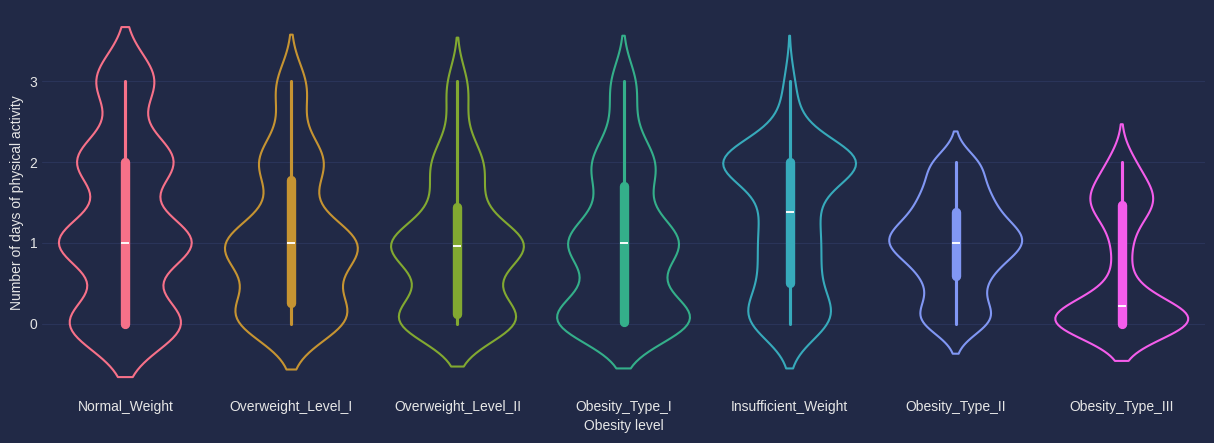

In [24]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x="obesity_level", y="physical_activity", hue="obesity_level", fill=False)
plt.ylabel("Number of days of physical activity")
plt.xlabel("Obesity level");

### Technology usage habits in relation to obesity levels

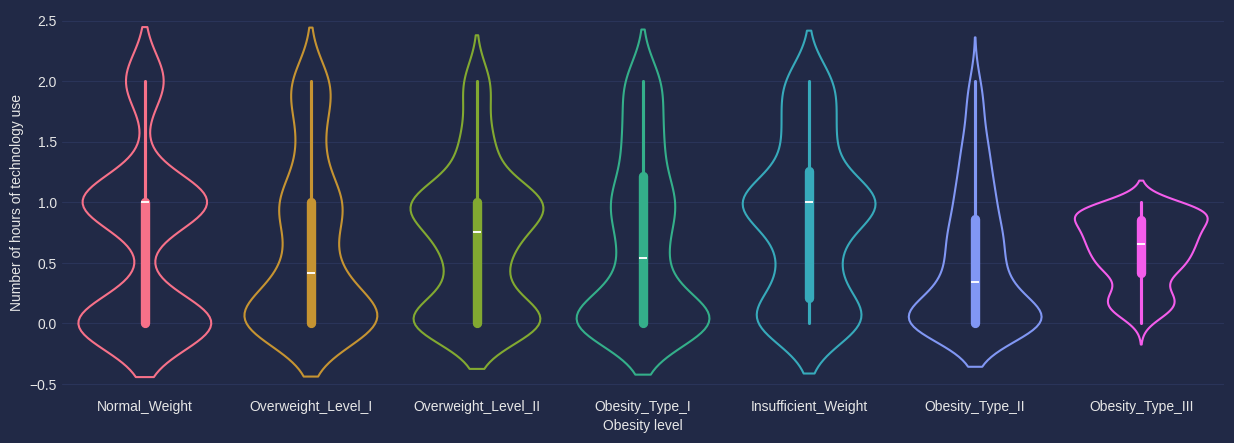

In [25]:
plt.figure(figsize=(15, 5))
sns.violinplot(data=df, x="obesity_level", y="use_of_technology", hue="obesity_level", fill=False);
plt.ylabel("Number of hours of technology use")
plt.xlabel("Obesity level");

### Alcohol drinking habits in relation to obesity levels

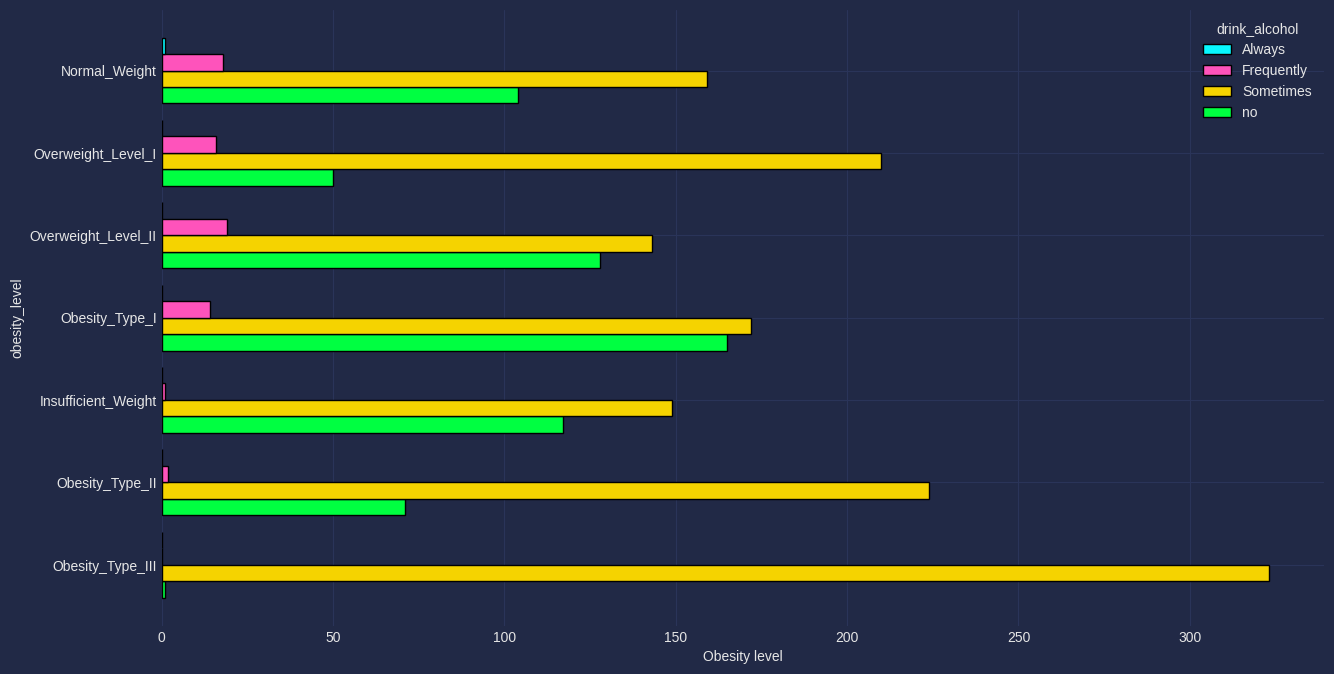

In [26]:
plt.figure(figsize=(15, 8))
sns.histplot(df, y="obesity_level", hue="drink_alcohol", multiple="dodge", shrink=0.8, hue_order=["Always", "Frequently", "Sometimes", "no"], alpha=1)
plt.xlabel("Obesity level");

### Obesity levels according to the type of transportation used

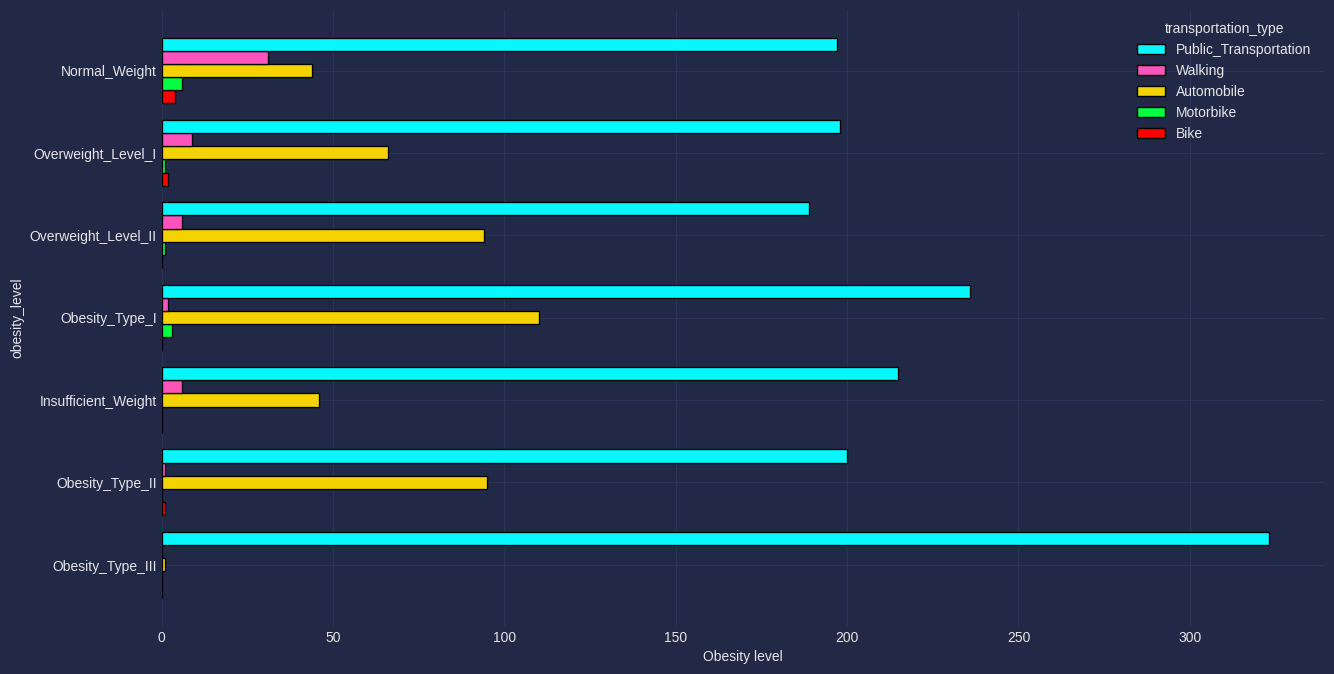

In [27]:
plt.figure(figsize=(15, 8))
sns.histplot(df, y="obesity_level", hue="transportation_type", multiple="dodge", shrink=0.8, alpha=1)
plt.xlabel("Obesity level");

# Splitting the dataset

## Setting seeds for reproducibility

In [28]:
import random
import os

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)

## Setting the validation framework

In [29]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.15, random_state=seed_value, stratify=df["obesity_level"])
df_train, df_val = train_test_split(df_full_train, test_size=0.15, random_state=seed_value, stratify=df_full_train["obesity_level"])
len(df_train), len(df_test), len(df_val)

(1507, 314, 266)

## Removing specific columns and separating features from the target column

According to [the dataset's article](https://doi.org/10.1016/j.dib.2019.104344), the data was labeled using the following equation:

$ Mass\space body\space index = \frac{weight}{{height}^2}$

Therefore, we need to delete at least a feature into previous equation.

In [30]:
cols_drop = ["obesity_level", "weight"]
X_full_train, y_full_train = df_full_train.drop(cols_drop, axis=1), df_full_train["obesity_level"]
X_train, y_train =  df_train.drop(cols_drop, axis=1), df_train["obesity_level"]
X_val, y_val =  df_val.drop(cols_drop, axis=1), df_val["obesity_level"]
X_test, y_test =  df_test.drop(cols_drop, axis=1), df_test["obesity_level"]

# Standardization

In [31]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(exclude=["object"]).columns

ss = StandardScaler().set_output(transform="pandas")

ss.fit(X_train[numeric_cols])
ss.transform(X_train[numeric_cols])

,age,height,eat_vegetables,main_meals,drink_water,physical_activity,use_of_technology
2071,-0.859706,0.482798,1.091725,0.378982,0.667080,-0.024754,0.010910
190,-0.679409,-1.084919,-0.803418,0.378982,-0.005343,-0.007330,-1.100719
1361,-0.996350,-0.153529,0.593585,0.378982,-0.009926,0.410323,-0.329281
2109,0.011829,0.409630,1.091725,0.378982,1.387169,0.157412,-0.135712
325,-0.520938,-1.620791,-0.803418,-2.235837,-1.639098,-0.007330,-1.100719
...,...,...,...,...,...,...,...
1357,-0.996350,0.891401,-0.803418,-0.306828,1.066065,-0.007330,-0.820984
1013,4.906080,0.729214,-0.803418,0.378982,-0.005343,-0.007330,-1.100719
1971,-0.790813,1.243673,1.091725,0.378982,1.137754,0.609467,0.157322
1265,-1.048027,0.399074,-0.803418,0.378982,-0.005343,-1.191614,-0.716527


# One-hot encoding of features

In [32]:
from sklearn.feature_extraction import DictVectorizer

dict_X_full_train = X_full_train.to_dict("records")
dict_X_train = X_train.to_dict("records")
dict_X_val = X_val.to_dict("records")
dict_X_test = X_test.to_dict("records")

dv = DictVectorizer(sparse=False).set_output(transform="pandas")
dv.fit(dict_X_train)

dv.transform(dict_X_train).head()

,age,drink_alcohol=Always,drink_alcohol=Frequently,drink_alcohol=Sometimes,drink_alcohol=no,drink_water,eat_hc_food=no,eat_hc_food=yes,eat_vegetables,gender=Female,...,snack=Always,snack=Frequently,snack=Sometimes,snack=no,transportation_type=Automobile,transportation_type=Bike,transportation_type=Motorbike,transportation_type=Public_Transportation,transportation_type=Walking,use_of_technology
0,18.862264,0.0,0.0,1.0,0.0,2.411582,0.0,1.0,3.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.675076
1,20.000000,0.0,0.0,1.0,0.0,2.000000,0.0,1.0,2.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
2,18.000000,0.0,0.0,1.0,0.0,1.997195,0.0,1.0,2.737149,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.468483
3,24.361936,0.0,0.0,1.0,0.0,2.852339,0.0,1.0,3.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.586035
4,21.000000,0.0,0.0,1.0,0.0,1.000000,0.0,1.0,2.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000


# Creating a Pipeline

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class MyStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self, numeric_cols):
        self.ss = StandardScaler().set_output(transform="pandas")
        self.numeric_cols = numeric_cols
        return

    def fit(self, X):
        self.ss.fit(X[self.numeric_cols])
        return self

    def transform(self, X):
        X[self.numeric_cols] = self.ss.transform(X[self.numeric_cols])
        return X.to_dict("records")

numeric_cols = X_train.select_dtypes(exclude=["object"]).columns
pipe = Pipeline([('ss', MyStandardScaler(numeric_cols=numeric_cols)), ('dv', DictVectorizer(sparse=False).set_output(transform="pandas"))])

X_train = pipe.fit_transform(X_train)
X_full_train = pipe.transform(X_full_train)
X_val = pipe.transform(X_val)
X_test = pipe.transform(X_test)

# Label encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_full_train = le.transform(y_full_train)
y_train = le.transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

# Computing weigths for classes and samples

In [35]:
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight

class_full_weight = compute_class_weight(class_weight="balanced", classes=np.unique(y_full_train), y=y_full_train)
class_full_weight = dict(zip(np.unique(y_full_train), class_full_weight))

class_weight = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight = dict(zip(np.unique(y_train), class_weight))

sample_full_weights = compute_sample_weight(
    class_weight=class_full_weight,
    y=y_full_train
)

sample_weights = compute_sample_weight(
    class_weight=class_weight,
    y=y_train
)

# Training the models

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {"max_iter":[200, 300, 400, 500],
              "C":[20, 15, 10],
              "class_weight":["balanced"],
              "solver":["lbfgs", "newton-cg", "sag", "saga"]}

lr = LogisticRegression(random_state=seed_value)
gs_lr = GridSearchCV(lr, param_grid=parameters, n_jobs=-1, cv=5, scoring="roc_auc_ovr")
gs_lr.fit(X_full_train, y_full_train, sample_weight=sample_full_weights)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [20, 15, 10], 'class_weight': ['balanced'],
                         'max_iter': [200, 300, 400, 500],
                         'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
             scoring='roc_auc_ovr')

In [37]:
from sklearn.metrics import roc_auc_score
y_pred_test_lr = gs_lr.predict_proba(X_test)
roc_auc_score(y_test, y_pred_test_lr, multi_class="ovr")

0.889393203661662

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
parameters = {"criterion":["gini", "entropy", "log_loss"],
              "max_depth":[5, 6, 7, 8, 9],
              "max_leaf_nodes":[30, 40, 50, 60],
              "min_samples_split":[30, 40],
              "class_weight":["balanced"],}

dt = DecisionTreeClassifier(random_state=seed_value)
gs_dt = GridSearchCV(dt, param_grid=parameters, n_jobs=-1, cv=5, scoring="roc_auc_ovr")
gs_dt.fit(X_full_train, y_full_train, sample_weight=sample_full_weights)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_leaf_nodes': [30, 40, 50, 60],
                         'min_samples_split': [30, 40]},
             scoring='roc_auc_ovr')

In [39]:
y_pred_test_dt = gs_dt.predict_proba(X_test)
roc_auc_score(y_test, y_pred_test_dt, multi_class="ovr")

0.9213027545513881

## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
parameters = {"criterion":["gini", "entropy", "log_loss"],
              "n_estimators":[100, 200, 300, 400],
              "max_depth":[5, 6, 7, 8, 9],
              "class_weight":["balanced"],}

rf = RandomForestClassifier(random_state=seed_value)
gs_rf = GridSearchCV(rf, param_grid=parameters, n_jobs=-1, cv=5, scoring="roc_auc_ovr")
gs_rf.fit(X_full_train, y_full_train, sample_weight=sample_full_weights)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='roc_auc_ovr')

In [41]:
y_pred_test_rf = gs_rf.predict_proba(X_test)
roc_auc_score(y_test, y_pred_test_rf, multi_class="ovr")

0.9721096055019289

## Gradient Boosting with XGBoost

In [42]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=X_train.columns.tolist())
dval = xgb.DMatrix(X_val, label=y_val, feature_names=X_val.columns.tolist())
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=X_test.columns.tolist())

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'gamma':0.0001,
    'min_child_weight': 1,
    'alpha':0.01,

    'objective': 'multi:softprob',
    'num_class':7,
    'nthread': 8,
    'eval_metric':'auc',
    'num_parallel_tree':5,

    'seed':seed_value,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval, 'val')]
xgb_clf = xgb.train(xgb_params, dtrain, num_boost_round=10000, early_stopping_rounds=100, evals=watchlist, verbose_eval=10)
y_test_pred_xgb = xgb_clf.predict(dtest)
print(f"ROC:{roc_auc_score(y_test, y_test_pred_xgb, multi_class='ovr')}")

[0]	train-auc:0.96308	val-auc:0.88976
[10]	train-auc:0.98943	val-auc:0.93820
[20]	train-auc:0.99432	val-auc:0.94475
[30]	train-auc:0.99748	val-auc:0.95092
[40]	train-auc:0.99899	val-auc:0.95631
[50]	train-auc:0.99960	val-auc:0.95917
[60]	train-auc:0.99984	val-auc:0.96142
[70]	train-auc:0.99993	val-auc:0.96283
[80]	train-auc:0.99998	val-auc:0.96504
[90]	train-auc:1.00000	val-auc:0.96669
[100]	train-auc:1.00000	val-auc:0.96761
[110]	train-auc:1.00000	val-auc:0.96839
[120]	train-auc:1.00000	val-auc:0.96939
[130]	train-auc:1.00000	val-auc:0.96940
[140]	train-auc:1.00000	val-auc:0.96952
[150]	train-auc:1.00000	val-auc:0.96997
[160]	train-auc:1.00000	val-auc:0.97021
[170]	train-auc:1.00000	val-auc:0.97066
[180]	train-auc:1.00000	val-auc:0.97076
[190]	train-auc:1.00000	val-auc:0.97083
[200]	train-auc:1.00000	val-auc:0.97088
[210]	train-auc:1.00000	val-auc:0.97078
[220]	train-auc:1.00000	val-auc:0.97090
[230]	train-auc:1.00000	val-auc:0.97097
[240]	train-auc:1.00000	val-auc:0.97123
[250]	train

## Gradient Boosting with CatBoost

According to [this blog](https://aravindkolli.medium.com/understanding-catboost-the-gradient-boosting-algorithm-for-categorical-data-73ddb200895d).

CatBoost operates on the principle of gradient boosting, where it builds the model in a stage-wise fashion. It starts with a simple model and incrementally improves it by adding new models that correct the errors made by the preceding ones.

CatBoost introduces several key innovations:

### Ordered Boosting
One of the core innovations of CatBoost is its ordered boosting mechanism. Traditional gradient boosting methods can suffer from prediction shift due to the overlap between the training data for the base models and the data used to calculate the gradients. CatBoost addresses this by introducing a random permutation of the dataset in each iteration and using only the data before each example in the permutation for training. This approach reduces overfitting and improves model robustness.

### Symmetric Trees

CatBoost builds balanced trees, also known as symmetric trees, as its base predictors. Unlike traditional gradient boosting methods that build trees leaf-wise or depth-wise, CatBoost’s symmetric trees ensure that all leaf nodes at the same level share the same decision rule. This leads to faster execution and reduces the likelihood of overfitting.

In [43]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(loss_function='MultiClass',
                         eval_metric='AUC',
                         iterations=10000,
                         depth=6,
                         classes_count=7,
                         class_weights=class_weight,
                         learning_rate=0.1,
                         od_type='Iter',
                         early_stopping_rounds=1000,
                         bootstrap_type='MVS',
                         sampling_frequency='PerTree',
                         random_seed=seed_value,
                         verbose=True)
cbc.fit(X_train, y_train, sample_weight=sample_weights, eval_set=(X_val, y_val))

y_test_pred_cbc = cbc.predict_proba(X_test)
print(f"ROC:{roc_auc_score(y_test, y_test_pred_cbc, multi_class='ovr')}")

0:	test: 0.8701799	best: 0.8701799 (0)	total: 71.9ms	remaining: 11m 58s
1:	test: 0.8965569	best: 0.8965569 (1)	total: 88.5ms	remaining: 7m 22s
2:	test: 0.9265985	best: 0.9265985 (2)	total: 108ms	remaining: 5m 58s
3:	test: 0.9349365	best: 0.9349365 (3)	total: 123ms	remaining: 5m 8s
4:	test: 0.9400962	best: 0.9400962 (4)	total: 139ms	remaining: 4m 37s
5:	test: 0.9449012	best: 0.9449012 (5)	total: 154ms	remaining: 4m 16s
6:	test: 0.9506129	best: 0.9506129 (6)	total: 170ms	remaining: 4m 2s
7:	test: 0.9568892	best: 0.9568892 (7)	total: 191ms	remaining: 3m 58s
8:	test: 0.9581995	best: 0.9581995 (8)	total: 213ms	remaining: 3m 56s
9:	test: 0.9600712	best: 0.9600712 (9)	total: 239ms	remaining: 3m 58s
10:	test: 0.9615237	best: 0.9615237 (10)	total: 254ms	remaining: 3m 50s
11:	test: 0.9615294	best: 0.9615294 (11)	total: 272ms	remaining: 3m 46s
12:	test: 0.9619758	best: 0.9619758 (12)	total: 288ms	remaining: 3m 41s
13:	test: 0.9639861	best: 0.9639861 (13)	total: 303ms	remaining: 3m 36s
14:	test: 0

## Comparison of models

In [59]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

def get_scores(y_true, y_pred, y_pred_proba):
    return {'AUC_ROC':roc_auc_score(y_true, y_pred_proba, multi_class='ovr'),
           'F1_Score':f1_score(y_true, y_pred, average='weighted'),
           'Accuracy':accuracy_score(y_true, y_pred),
           'Precision':precision_score(y_true, y_pred, average='weighted'),
           'Recall':recall_score(y_true, y_pred, average='weighted')}
scores = []
for model in [gs_lr, gs_dt, gs_rf, xgb_clf, cbc]:
    if model == xgb_clf:
        y_test_pred = np.argmax(model.predict(dtest), axis=1)
        y_test_pred_proba = model.predict(dtest)
    else:
        y_test_pred = model.predict(X_test)
        y_test_pred_proba = model.predict_proba(X_test)
    scores.append(get_scores(y_test, y_test_pred, y_test_pred_proba).values())

comparison = pd.DataFrame(data=scores, index=["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "CatBoost"], columns=["AUC_ROC", "F1_Score", "Accuracy", "Precision", "Recall"])
comparison.style.highlight_max(color = 'green', axis = 0).highlight_min(color = 'red', axis = 0)

,AUC_ROC,F1_Score,Accuracy,Precision,Recall
Logistic Regression,0.889393,0.621080,0.636943,0.631468,0.636943
Decision Tree,0.921303,0.682760,0.681529,0.691372,0.681529
Random Forest,0.972110,0.838787,0.840764,0.842998,0.840764
XGBoost,0.980677,0.866181,0.866242,0.867547,0.866242
CatBoost,0.984935,0.891044,0.891720,0.891502,0.891720


### Confusion matrix

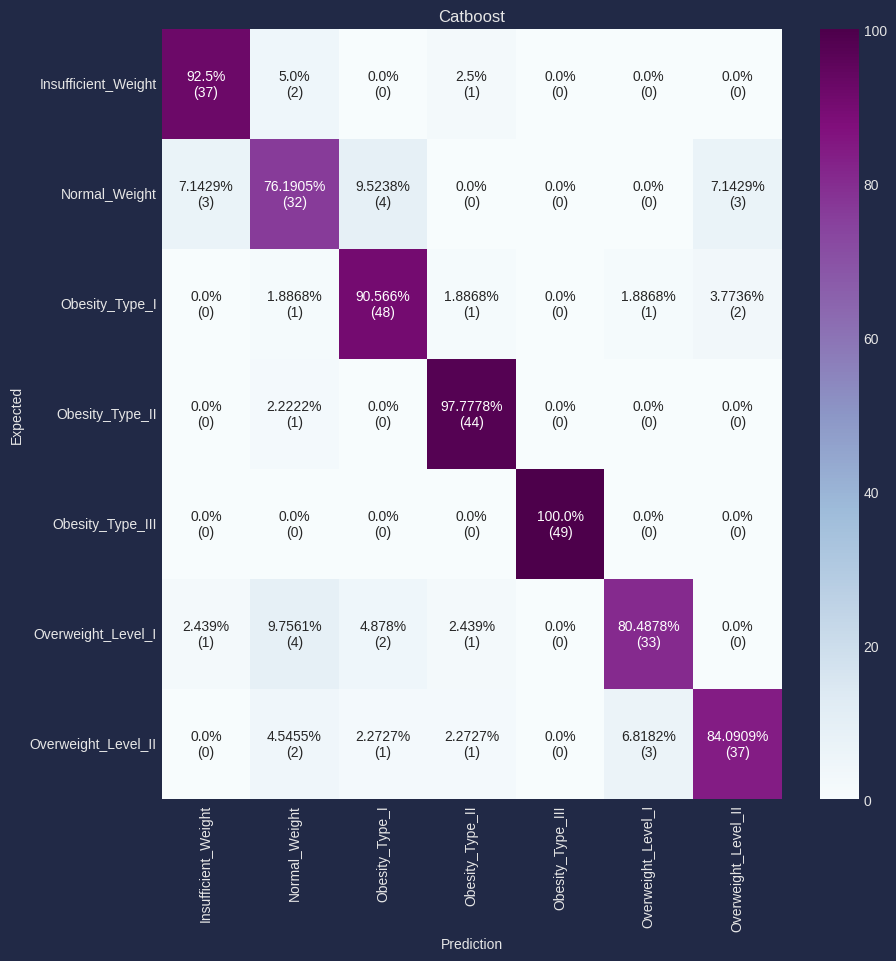

In [60]:
from sklearn.metrics import confusion_matrix

def my_cm(y_true, y_pred, title):
    cm_val = confusion_matrix(y_true, y_pred)
    cm_pgs = np.round(confusion_matrix(y_true, y_pred, normalize='true')*100, 4)

    formatted_text = (np.asarray([f"{pgs}%\n({val})" for val, pgs in zip(cm_val.flatten(), cm_pgs.flatten())])).reshape(7, 7)

    sns.heatmap(cm_pgs, annot=formatted_text, fmt='', cmap='BuPu', yticklabels=le.classes_, xticklabels=le.classes_)
    plt.title(title)
    plt.xlabel("Prediction")
    plt.ylabel("Expected")

    plt.subplots_adjust(hspace=0.5)
    return

y_test_pred_cbc = cbc.predict(X_test)

plt.figure(figsize=(10, 10))
my_cm(y_test, y_test_pred_cbc, title="Catboost")

## Saving the pipeline, the label encoder and the model with CloudPickle

An important difference between `cloudpickle` and `pickle` is that `cloudpickle` can serialize a function or class **by value**, whereas `pickle` can only serialize it **by reference**.

**Serialization by reference** treats functions and classes as attributes of modules, and pickles them through instructions that trigger the import of their module at load time. **Serialization by reference** is thus limited in that it assumes that the module containing the function or class is available/importable in the unpickling environment. This assumption breaks when pickling constructs defined in an interactive session, a case that is automatically detected by `cloudpickle`, that pickles such constructs **by value**.

In [62]:
import cloudpickle

with open('obesity-levels-model.bin', 'wb') as f_out:
    cloudpickle.dump((pipe, le, cbc), f_out)